In [1]:
# Import libraries for data operations
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import pickle

# Import libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)

# A. DATA UNDERSTANDING AND PREPARATION

The dataset used was downloaded from this url: https://www.kaggle.com/competitions/playground-series-s3e3/data

<b>Dataset Description:

The dataset for this competition (both train and test) was generated from a deep learning model trained on a Employee Attrition. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.
    
Some categorical variables were already label encoded. Here are the corresponding values:

Education
[1]'Below College'
[2] 'College'
[3] 'Bachelor'
[4] 'Master'
[5] 'Doctor'

EnvironmentSatisfaction
[1] 'Low'
[2] 'Medium'
[3] 'High'
[4] 'Very High'

JobInvolvement
[1] 'Low'
[2] 'Medium'
[3] 'High'
[4] 'Very High'

JobSatisfaction
[1] 'Low'
[2] 'Medium'
[3] 'High'
[4] 'Very High'

PerformanceRating
[1] 'Low'
[2] 'Good'
[3] 'Excellent'
[4] 'Outstanding'

RelationshipSatisfaction
[1] 'Low'
[2] 'Medium'
[3] 'High'
[4] 'Very High'

WorkLifeBalance
[1] 'Bad'
[2] 'Good'
[3] 'Better'
[4] 'Best'

In [524]:
train_path = r'C:\Users\MIllenium\Desktop\Personal\ML Projects\Dataset\playground-series-s3e3\attrition_train.csv'
test_path = r'C:\Users\MIllenium\Desktop\Personal\ML Projects\Dataset\playground-series-s3e3\attrition_test.csv'
orig_path = r'C:\Users\MIllenium\Desktop\Personal\ML Projects\Dataset\playground-series-s3e3\WA_Fn-UseC_-HR-Employee-Attrition.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
original = pd.read_csv(orig_path)

We will add the original dataset to have more samples for training the model.

In [3]:
# Display first 5 rows of the train dataset
train.head(5)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [4]:
# Display first 5 rows of the test dataset
test.head(5)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0


In [5]:
# Display first 5 rows of the original dataset
original.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


First we will format the original dataset similar to the competition dataset and merge the two dataset as the training dataset.

In [6]:
print('Duplicates from Original Dataset:', original.duplicated().sum())
print('Duplicates from Train Dataset:', train.duplicated().sum())
print('Duplicates from Test Dataset:', test.duplicated().sum())

Duplicates from Original Dataset: 0
Duplicates from Train Dataset: 0
Duplicates from Test Dataset: 0


There are no dupicates in each dataset.

In [525]:
# Drop the unique identifier in each dataset
df_train = train.drop('id', axis=1)
df_test = test.drop('id',axis=1)
df_original = original.drop('EmployeeNumber', axis=1)

In [526]:
# Format the original dataset to follow the column order of the competition dataset.
df_original = df_original[list(df_train.columns)]
df_original

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,No


In [527]:
# Create a new dataframe 'df_train_ext' that contains the train dataset and the original dataset
df_train_ext = pd.concat([df_train, df_original])
df_train_ext

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,No


In [528]:
# Replace the string values in the 'Attrition' column. 0 for 'No' and 1 for 'Yes'
df_train_ext['Attrition'] = df_train_ext['Attrition'].replace({'No':0, 'Yes':1})

# Check if the values in the 'Attrition' column are 0 and 1 only
df_train_ext['Attrition'].value_counts()

0    2710
1     437
Name: Attrition, dtype: int64

In [11]:
# Check if the combined rows of df_train and df_original is equal to the rows in df_train_ext
print('Sum of rows:', df_train.shape[0]+df_original.shape[0])
print('Total Rows in df_train_ext:', df_train_ext.shape[0])

Sum of rows: 3147
Total Rows in df_train_ext: 3147


In [12]:
# Display the number of rows and the datatypes of each columns in the extended train dataset
df_train_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3147 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       3147 non-null   int64 
 1   BusinessTravel            3147 non-null   object
 2   DailyRate                 3147 non-null   int64 
 3   Department                3147 non-null   object
 4   DistanceFromHome          3147 non-null   int64 
 5   Education                 3147 non-null   int64 
 6   EducationField            3147 non-null   object
 7   EmployeeCount             3147 non-null   int64 
 8   EnvironmentSatisfaction   3147 non-null   int64 
 9   Gender                    3147 non-null   object
 10  HourlyRate                3147 non-null   int64 
 11  JobInvolvement            3147 non-null   int64 
 12  JobLevel                  3147 non-null   int64 
 13  JobRole                   3147 non-null   object
 14  JobSatisfaction         

The extended train dataset has 3,147 rows and 34 columns including the target variable. Based on the non-null count, there are no null values in the dataset. We will check the unique values in each categorical column if there are values such as 'None', 'N/A', 'Nan' or other values that may indicate that the value is null.

In [13]:
# Display the number of rows and the datatypes of each columns in the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1119 non-null   int64 
 1   BusinessTravel            1119 non-null   object
 2   DailyRate                 1119 non-null   int64 
 3   Department                1119 non-null   object
 4   DistanceFromHome          1119 non-null   int64 
 5   Education                 1119 non-null   int64 
 6   EducationField            1119 non-null   object
 7   EmployeeCount             1119 non-null   int64 
 8   EnvironmentSatisfaction   1119 non-null   int64 
 9   Gender                    1119 non-null   object
 10  HourlyRate                1119 non-null   int64 
 11  JobInvolvement            1119 non-null   int64 
 12  JobLevel                  1119 non-null   int64 
 13  JobRole                   1119 non-null   object
 14  JobSatisfaction         

The test data set has 1,119 rows and 33 columns excluding the target variable. Based on the non-null count, there are no null values in the dataset. We will check the unique values in each categorical column if there are values such as 'None', 'N/A', 'Nan' or other values that may indicate that the value is null.

In [14]:
# Check the distribution of the target variable in the train dataset
df_train_ext['Attrition'].value_counts(normalize=True)

0    0.861138
1    0.138862
Name: Attrition, dtype: float64

We have an unbalanced dataset. We will maintain this distribution in for now. We will decide later on if there is a need to balance this by oversampling or undersampling.

In [15]:
for i in df_train_ext.select_dtypes(include=['object']).columns.to_list():
    print(i, df_train_ext[i].unique())
    print(df_train_ext[i].value_counts())
    print('-'*50, '\n')


BusinessTravel ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Travel_Rarely        2333
Travel_Frequently     538
Non-Travel            276
Name: BusinessTravel, dtype: int64
-------------------------------------------------- 

Department ['Research & Development' 'Sales' 'Human Resources']
Research & Development    2128
Sales                      917
Human Resources            102
Name: Department, dtype: int64
-------------------------------------------------- 

EducationField ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Life Sciences       1381
Medical             1013
Marketing            311
Technical Degree     238
Other                164
Human Resources       40
Name: EducationField, dtype: int64
-------------------------------------------------- 

Gender ['Male' 'Female']
Male      1946
Female    1201
Name: Gender, dtype: int64
-------------------------------------------------- 

JobRole ['Laboratory Technician' 'Sales Representativ

No values in the categorical variables are unusual or indicative of null value.

## A1. Data Structuring

In [16]:
# Remove spaces in column names in the train dataset
df_train_ext.columns = df_train_ext.columns.str.replace(' ', '')
df_train_ext.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

This is to make sure that we call the approriate column names.

In [17]:
# Remove spaces in column names in the test dataset
df_test.columns = df_test.columns.str.replace(' ', '')
df_test.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## A1.1 Duplicates

In [18]:
# Check for duplicated rows in the train dataset
print('Duplicates', df_train_ext.duplicated().sum())


Duplicates 0


In [19]:
# Check for duplicated rows in the test dataset
print('Duplicates', df_test.duplicated().sum())

Duplicates 0


## A1.2 Outliers

Although the models that I will be using are robust against outliers, we will still check if there are outliers.

In [20]:
# Identify the categorical variables in the dataset
cat_var = df_train_ext.select_dtypes(include=['object']).columns.to_list()


['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

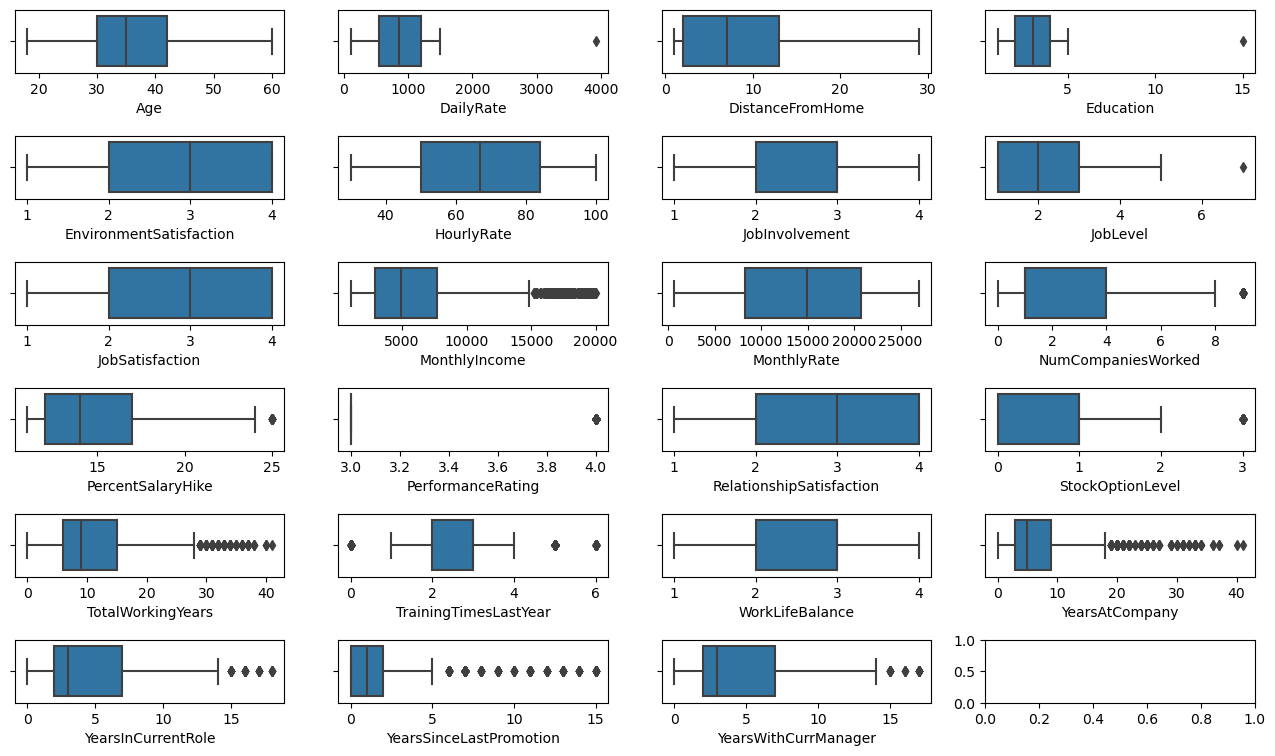

In [21]:
# Visualize outliers for each variable in the train dataset
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(16, 9))

subplt = [[i, j] for i in range(6) for j in range(4)]


for i,col in enumerate(df_train_ext.loc[:,~df_train_ext.columns.isin(['BusinessTravel', 'Department', 'EducationField',
                                                                      'Gender', 'JobRole', 'MaritalStatus', 'Over18',
                                                                      'OverTime', 'EmployeeCount', 'StandardHours', 'Attrition'])].columns):
    sns.boxplot(x=df_train_ext[col], ax=ax[subplt[i][0],subplt[i][1]])
    #ax[subplt[i][0],subplt[i][1]].set_title('Plot {:}'.format(i+1))

plt.subplots_adjust(hspace=1)        
plt.show()

In [22]:
# Investigate outliers using statistical methods
ol_summ = pd.DataFrame(columns=['predictor', 'lower_limit', 'upper_limit', 'outlier_count'])

for col in df_train_ext.loc[:,~df_train_ext.columns.isin(['BusinessTravel', 'Department', 'EducationField', 'Gender',
                                                          'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'EmployeeCount',
                                                          'StandardHours', 'Attrition'])].columns:
    # Compute the lower and upper limit
    q3 = df_train_ext[col].quantile(.75)
    q1 = df_train_ext[col].quantile(.25)
    lower_limit = q1 - ((q3 - q1) * 1.5)
    upper_limit = q3 + ((q3 - q1) * 1.5)
    
    # Count the number of outliers
    outliers = df_train_ext[(df_train_ext[col] < lower_limit) | (df_train_ext[col] > upper_limit)].shape[0]
    
    # Create a new row with the computed values
    row = pd.DataFrame([[col, lower_limit, upper_limit, outliers]], columns=['predictor', 'lower_limit',
                                                                             'upper_limit', 'outlier_count'])
    
    # Append the row to the 'ol_summ' DataFrame
    ol_summ = pd.concat([ol_summ, row], ignore_index=True)


ol_summ['count_percentage'] = ((ol_summ['outlier_count']/df_train_ext.shape[0])*100).astype('str').apply(lambda x: '{:.0f}%'.format(float(x)))
ol_summ[ol_summ['count_percentage'] != '0%'].sort_values('outlier_count', ascending=False).reset_index(drop=True)

,predictor,lower_limit,upper_limit,outlier_count,count_percentage
0,TrainingTimesLastYear,0.5,4.5,449,14%
1,PerformanceRating,3.0,3.0,440,14%
2,YearsSinceLastPromotion,-3.0,5.0,439,14%
3,MonthlyIncome,-4367.5,14980.5,271,9%
4,YearsAtCompany,-6.0,18.0,212,7%
5,StockOptionLevel,-1.5,2.5,150,5%
6,NumCompaniesWorked,-3.5,8.5,115,4%
7,TotalWorkingYears,-7.5,28.5,110,3%
8,YearsInCurrentRole,-5.5,14.5,42,1%
9,YearsWithCurrManager,-5.5,14.5,30,1%


## A2. Exploratory Data Analysis

In [23]:
# Summary Statistics
df_train_ext.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,3147.00,3147.00,3147.00,3147.00,3147.0,3147.00,3147.00,3147.00,3147.00,3147.00,3147.00,3147.00,3147.00,3147.00,3147.00,3147.00,3147.0,3147.00,3147.00,3147.00,3147.00,3147.0,3147.00,3147.00,3147.00,3147.00
mean,36.45,850.59,8.92,2.93,1.0,2.74,66.91,2.76,2.03,2.76,6339.40,14556.60,2.63,15.05,3.14,2.73,80.0,0.76,10.98,2.76,2.77,6.9,4.18,2.08,4.16,0.14
std,8.82,390.86,7.96,1.03,0.0,1.09,19.88,0.68,1.09,1.10,4610.58,7117.33,2.49,3.54,0.35,1.08,0.0,0.81,7.51,1.21,0.68,6.0,3.60,3.13,3.57,0.35
min,18.00,102.00,1.00,1.00,1.0,1.00,30.00,1.00,1.00,1.00,1009.00,636.00,0.00,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00
25%,30.00,543.00,2.00,2.00,1.0,2.00,50.00,2.00,1.00,2.00,2888.00,8306.00,1.00,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.0,2.00,0.00,2.00,0.00
50%,35.00,852.00,7.00,3.00,1.0,3.00,67.00,3.00,2.00,3.00,4877.00,14908.00,1.00,14.00,3.00,3.00,80.0,1.00,9.00,3.00,3.00,5.0,3.00,1.00,3.00,0.00
75%,42.00,1198.50,13.00,4.00,1.0,4.00,84.00,3.00,3.00,4.00,7725.00,20744.50,4.00,17.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.0,7.00,2.00,7.00,0.00
max,60.00,3921.00,29.00,15.00,1.0,4.00,100.00,4.00,7.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.0,3.00,41.00,6.00,4.00,41.0,18.00,15.00,17.00,1.00


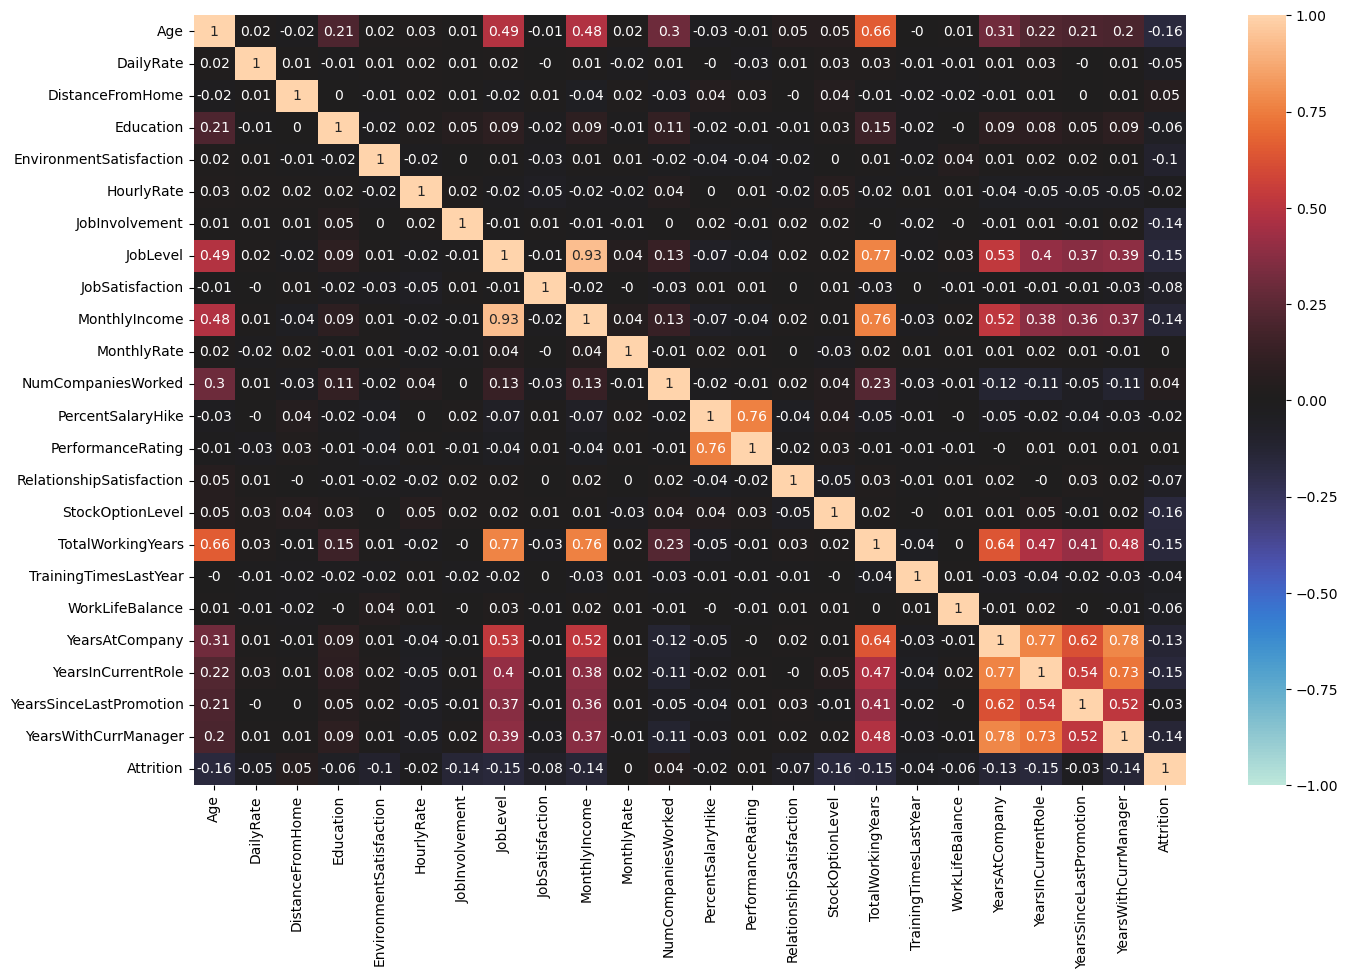

In [24]:
# Display correlation between varaibles
plt.figure(figsize=(16, 10))

correlation = df_train_ext.loc[:,~df_train_ext.columns.isin(['BusinessTravel', 'Department', 'EducationField', 
                                                             'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 
                                                             'EmployeeCount', 'Over18', 'StandardHours'])].corr().round(2)
sns.heatmap(correlation, vmin=-1, vmax=1, center=0 , annot=True)
plt.yticks(rotation=0)
plt.show()

I observed high positive correlation between jobLevel and TotalWorkingYears. As expected, time-related variables are highly correlated with each other. Other than that, MonthlyIncome is also highly correlated with TotalWorkingYears and jobLevel. The higher the job role, the higher the Monthly Income.

In [25]:
df_train_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3147 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       3147 non-null   int64 
 1   BusinessTravel            3147 non-null   object
 2   DailyRate                 3147 non-null   int64 
 3   Department                3147 non-null   object
 4   DistanceFromHome          3147 non-null   int64 
 5   Education                 3147 non-null   int64 
 6   EducationField            3147 non-null   object
 7   EmployeeCount             3147 non-null   int64 
 8   EnvironmentSatisfaction   3147 non-null   int64 
 9   Gender                    3147 non-null   object
 10  HourlyRate                3147 non-null   int64 
 11  JobInvolvement            3147 non-null   int64 
 12  JobLevel                  3147 non-null   int64 
 13  JobRole                   3147 non-null   object
 14  JobSatisfaction         

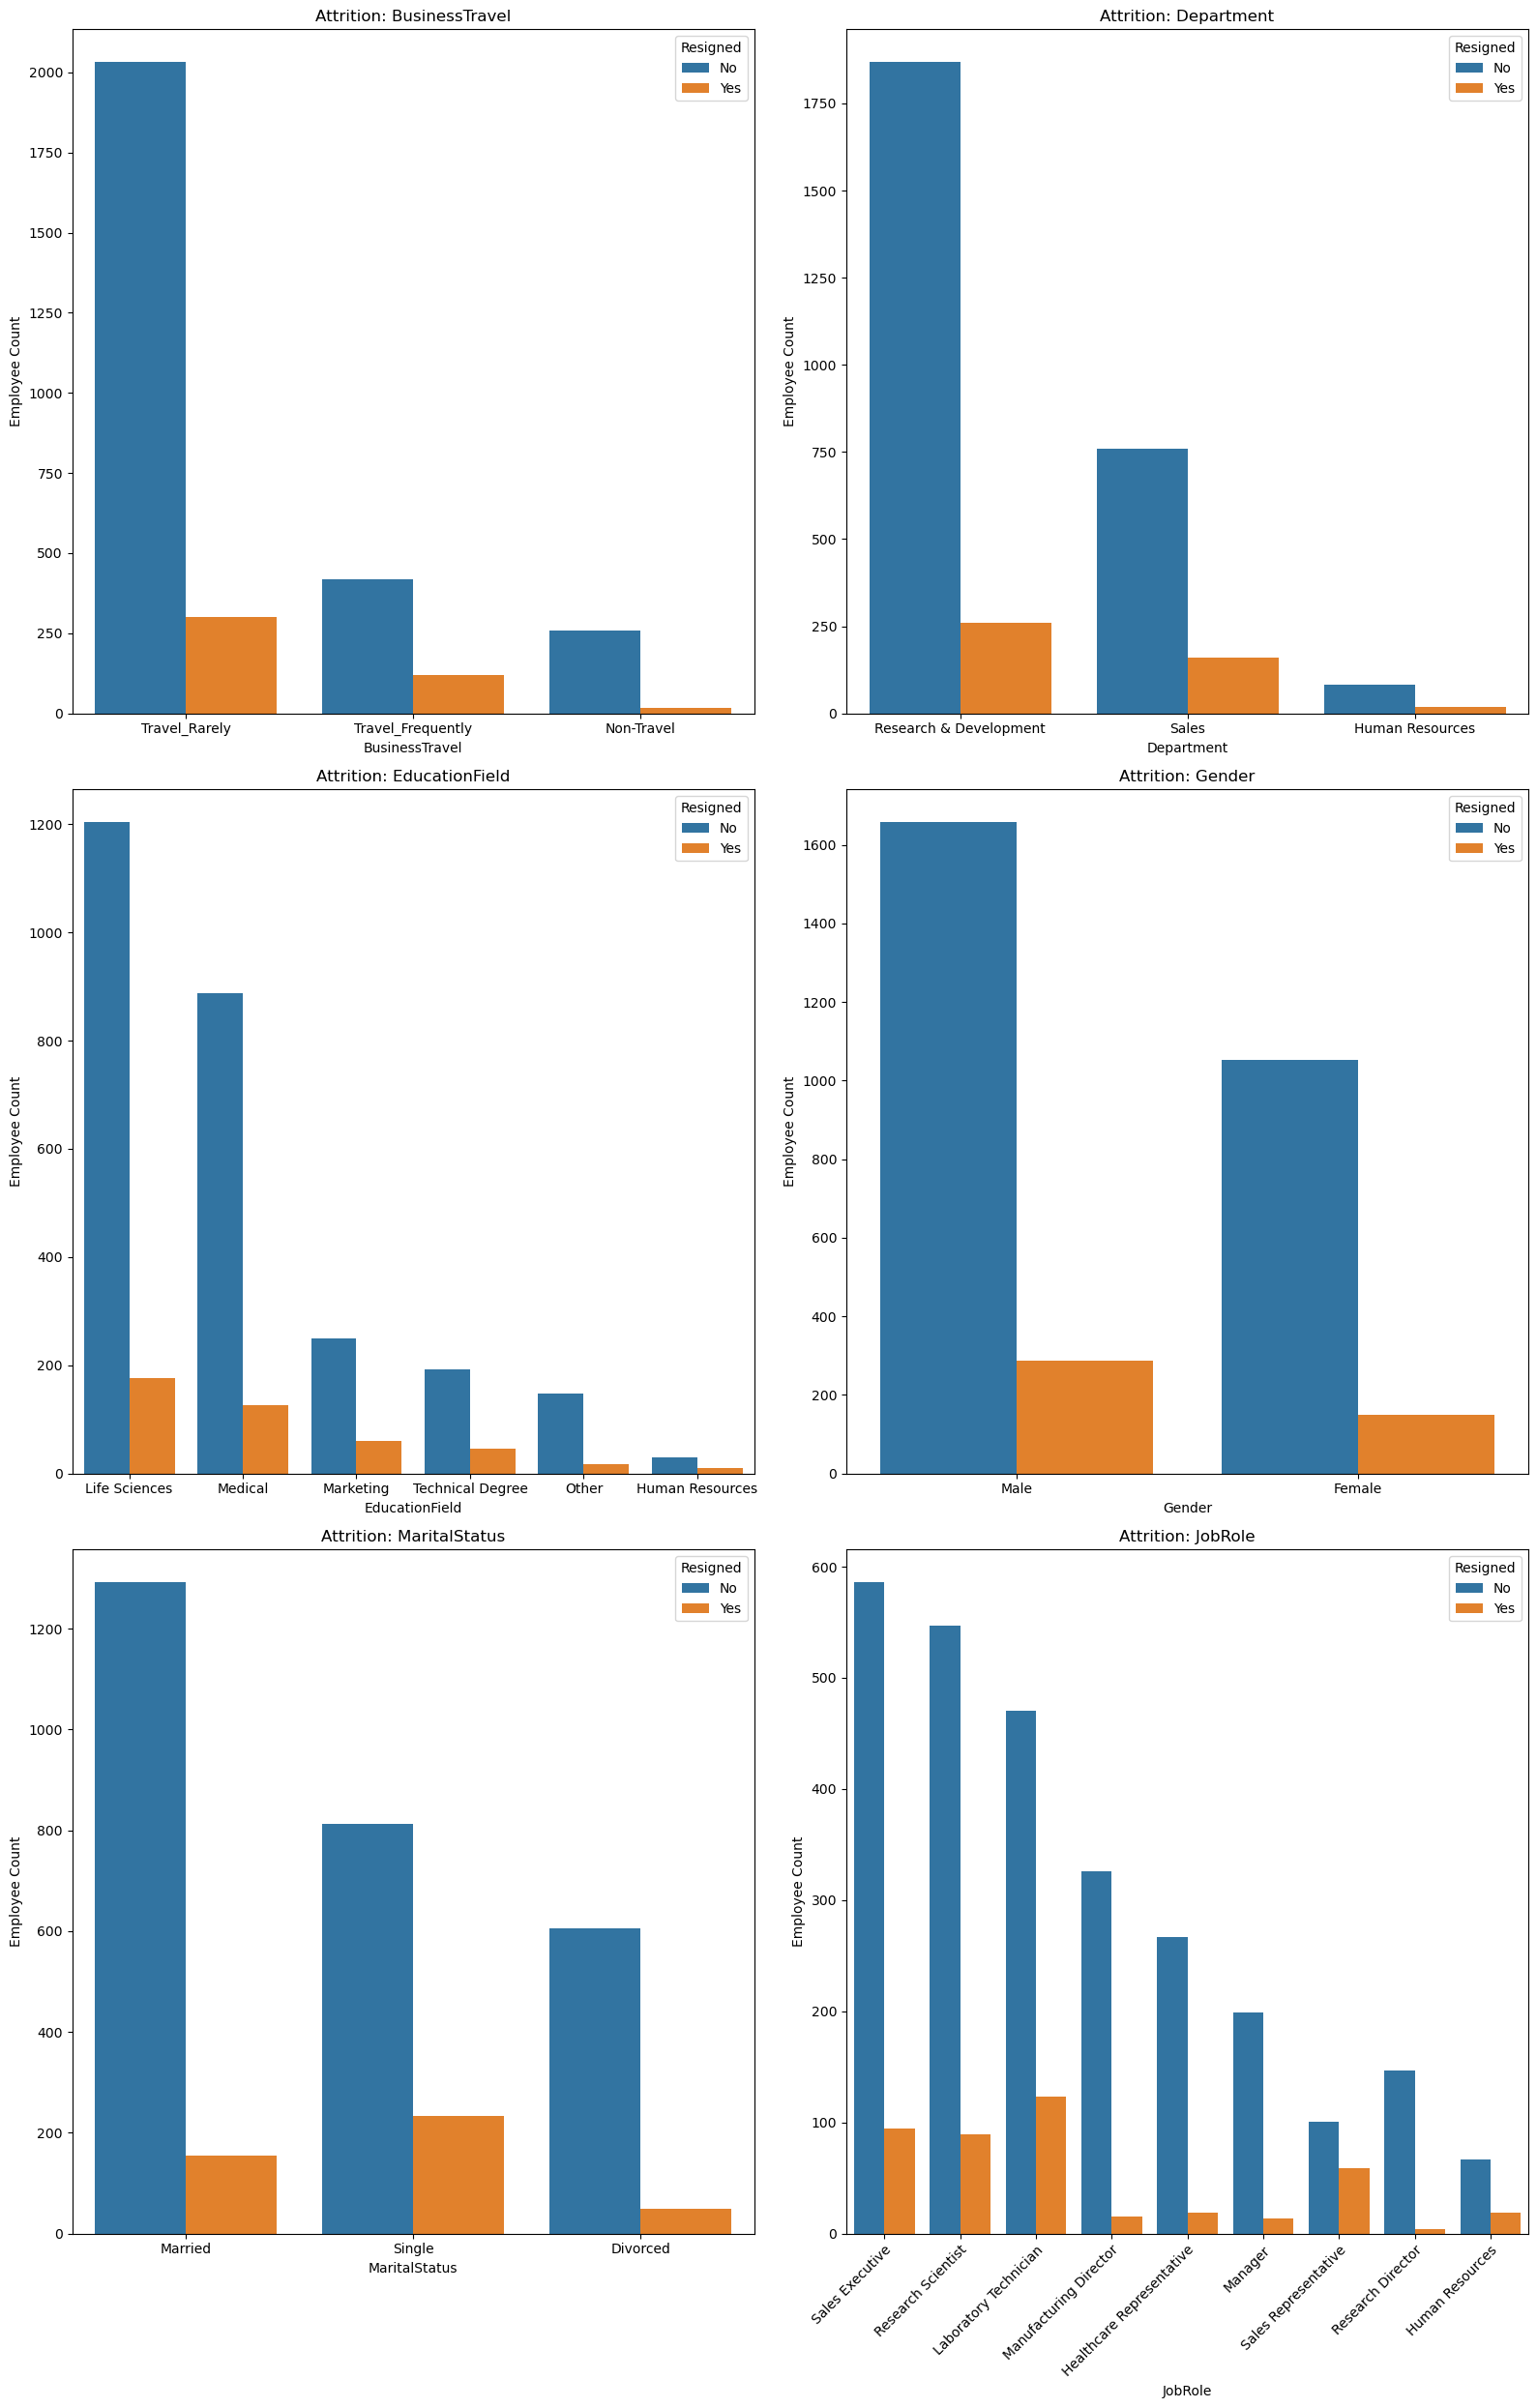

In [349]:
# Visualize outliers for each variable in the train dataset
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 25))


for i,col in enumerate(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole']):
    subplt = ax[i // 2, i % 2]
    sns.countplot(df_train_ext, x=col, hue='Attrition', ax=subplt, order=df_train_ext[col].value_counts().index)
    subplt.set_title(f'Attrition: {col}')
    subplt.legend(title='Resigned', labels=['No', 'Yes'])
    subplt.set_ylabel('Employee Count')
    if col == 'JobRole':
        subplt.set_xticklabels(subplt.get_xticklabels(), rotation=45, ha='right', wrap=True)
    

plt.subplots_adjust(hspace=.2)
plt.tight_layout()
plt.show()

Observations:
1. Majority of the employees travel rarely. 
<br>

2. The top 2 field of study of the employees are Life Sciences and Medical.
<br>

3. Majority of the employees belong to the research & development department.
<br>

4. Despite Life Sciences and Medical field as the dominant field of study by the employees, the top JobRole in the company belongs to Sales Executives. However, the top 2 and 3 job role belongs to Research Scientists and Laboratory Technician which are both connected to the medical field. In this case we could initially say that there is a significant portion of the employees who are career shifters from roles in the medical field to roles in sales.

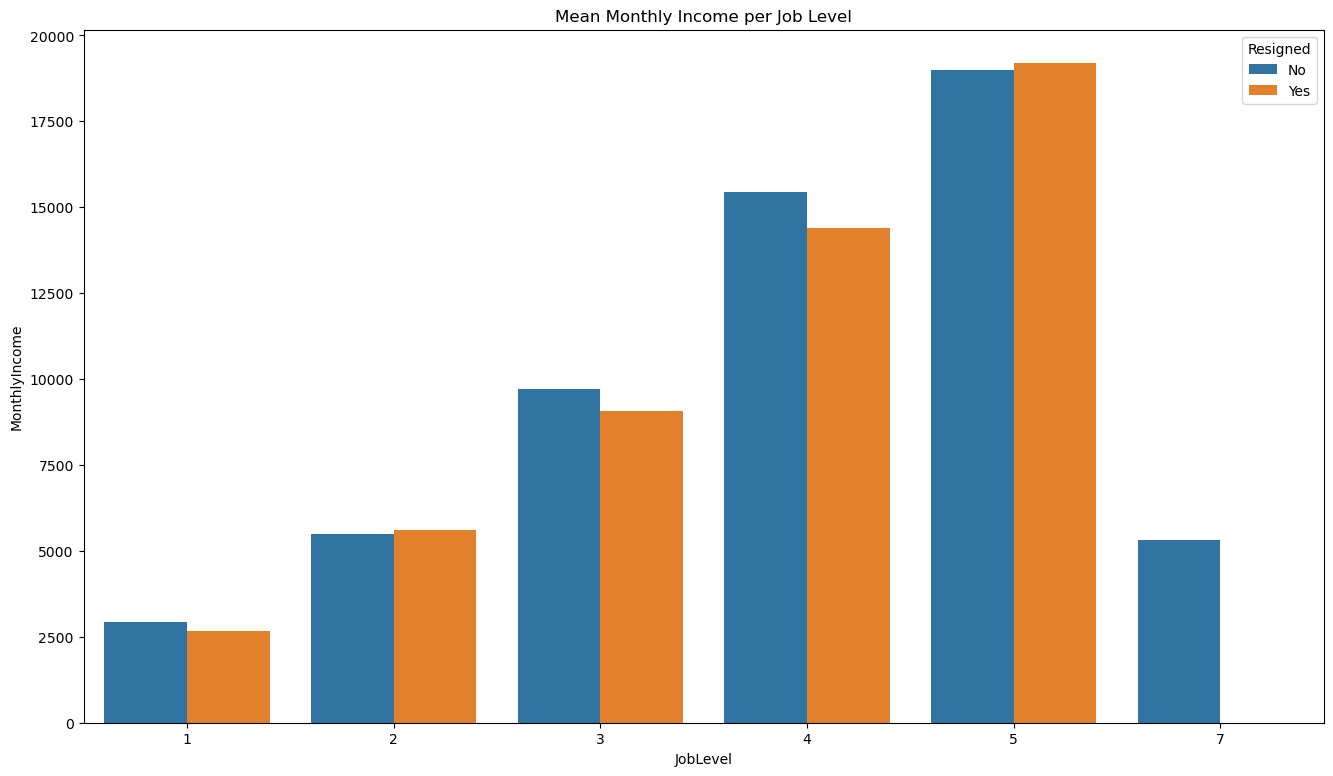

In [469]:
plt.figure(figsize=(16,9))
sns.barplot(df_train_ext, x='JobLevel', y='MonthlyIncome', hue='Attrition', errorbar=None)
plt.title('Mean Monthly Income per Job Level')
plt.legend(title='Resigned', labels=['No', 'Yes'], loc='upper right')
plt.show()

In [515]:
df_train_ext[df_train_ext['JobRole'] == 'Manufacturing Director']

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
5,27,Travel_Rarely,566,Research & Development,2,3,Other,1,3,Female,56,3,2,Manufacturing Director,2,Single,4197,7103,5,Y,No,11,3,4,80,0,6,0,3,1,0,1,0,0
11,29,Travel_Rarely,694,Research & Development,28,3,Life Sciences,1,3,Female,65,3,3,Manufacturing Director,3,Married,8628,13939,0,Y,No,11,3,4,80,0,10,2,3,9,0,0,7,0
17,52,Travel_Rarely,607,Research & Development,2,4,Technical Degree,1,2,Female,56,3,3,Manufacturing Director,3,Single,7441,21143,7,Y,No,13,3,4,80,0,28,5,1,10,2,0,8,0
19,25,Non-Travel,1092,Research & Development,1,1,Medical,1,4,Female,96,3,2,Manufacturing Director,4,Married,4374,17000,1,Y,Yes,17,3,1,80,0,5,3,4,5,3,1,4,0
25,29,Travel_Rarely,1005,Research & Development,3,1,Life Sciences,1,2,Female,86,2,2,Manufacturing Director,2,Single,4834,9129,5,Y,No,24,4,3,80,0,10,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,38,Travel_Frequently,508,Research & Development,6,4,Life Sciences,1,1,Male,72,2,2,Manufacturing Director,3,Married,5321,14284,2,Y,No,11,3,4,80,1,10,1,3,8,3,7,7,0
1440,36,Travel_Frequently,688,Research & Development,4,2,Life Sciences,1,4,Female,97,3,2,Manufacturing Director,2,Divorced,5131,9192,7,Y,No,13,3,2,80,3,18,3,3,4,2,0,2,0
1445,41,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,Y,No,23,4,3,80,1,21,3,3,20,7,0,10,0
1463,31,Non-Travel,325,Research & Development,5,3,Medical,1,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7,0


In [509]:
df_train_ext[df_train_ext['JobLevel'] == 7]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1535,30,Travel_Rarely,583,Research & Development,6,3,Life Sciences,1,4,Female,100,3,7,Manufacturing Director,3,Single,5326,22490,3,Y,No,13,3,4,80,0,12,1,2,8,7,1,5,0


This might be an encoding error or a case of underpaid employee. This employee is the only one with a job level of 7. The employee has a monthly income below the mean monthly income within the same job role.

This is a fictional dataset which might be the reason why some of the values might not make sense. If we look closely the Monthly Income and Monthly Rate columns, we can see significant difference between the two. One reason could be that the employee has other sources of income which is why the monthly income is higher than the monthly rate. On the other hand, the employee might have other expenses which leads to a monthly income significantly lower than the monthly rate. These are just speculations about this part of the dataset which cannot be confirmed as it was not provided.

For the purposes of this project, we will not dive deep on the relationship between the two variables.

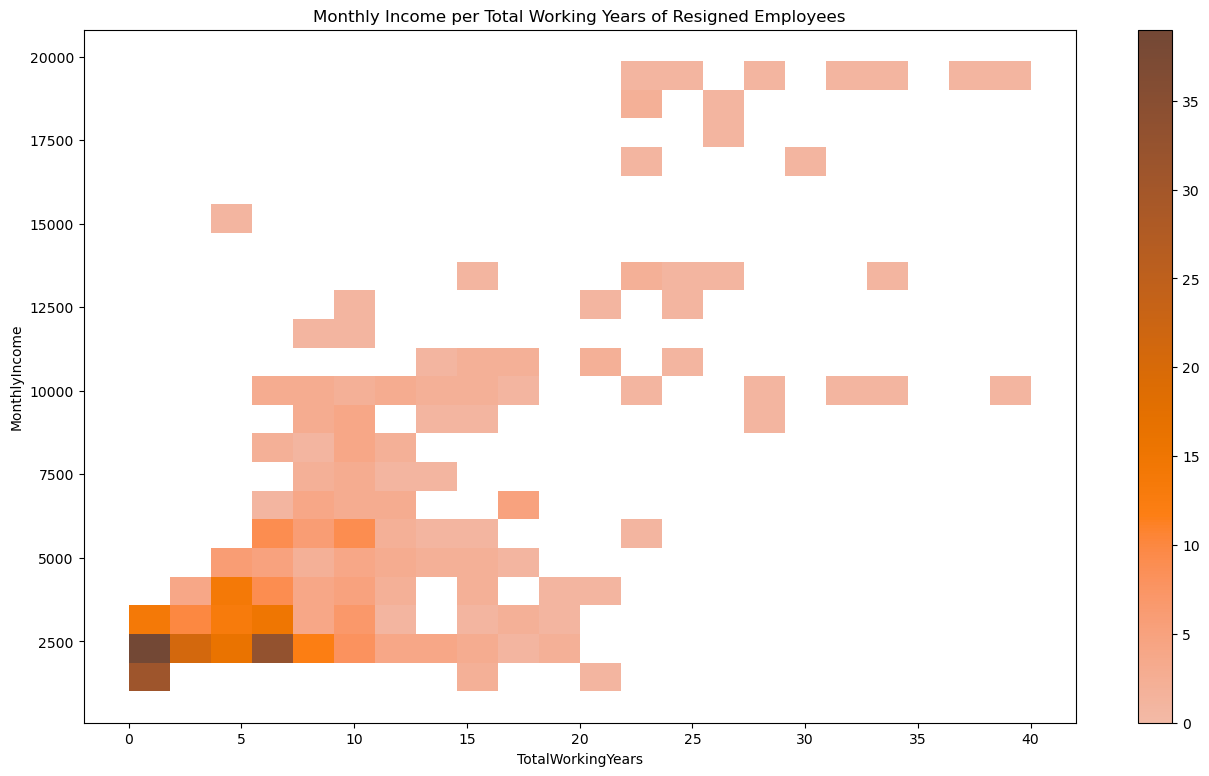

In [495]:
plt.figure(figsize=(16,9))
sns.histplot(df_train_ext[df_train_ext['Attrition'] == 1], x='TotalWorkingYears', y='MonthlyIncome', color='tab:orange', 
             cbar=True)
plt.title('Monthly Income per Total Working Years of Resigned Employees')
plt.show()

Attrition is concentrated to those employees who have total working years of 0-10 years with monthly income below 5,000. There is low concentration on employees with high monthly rates between 17,500 to 20,000 and total years of experience between 20-40 years.

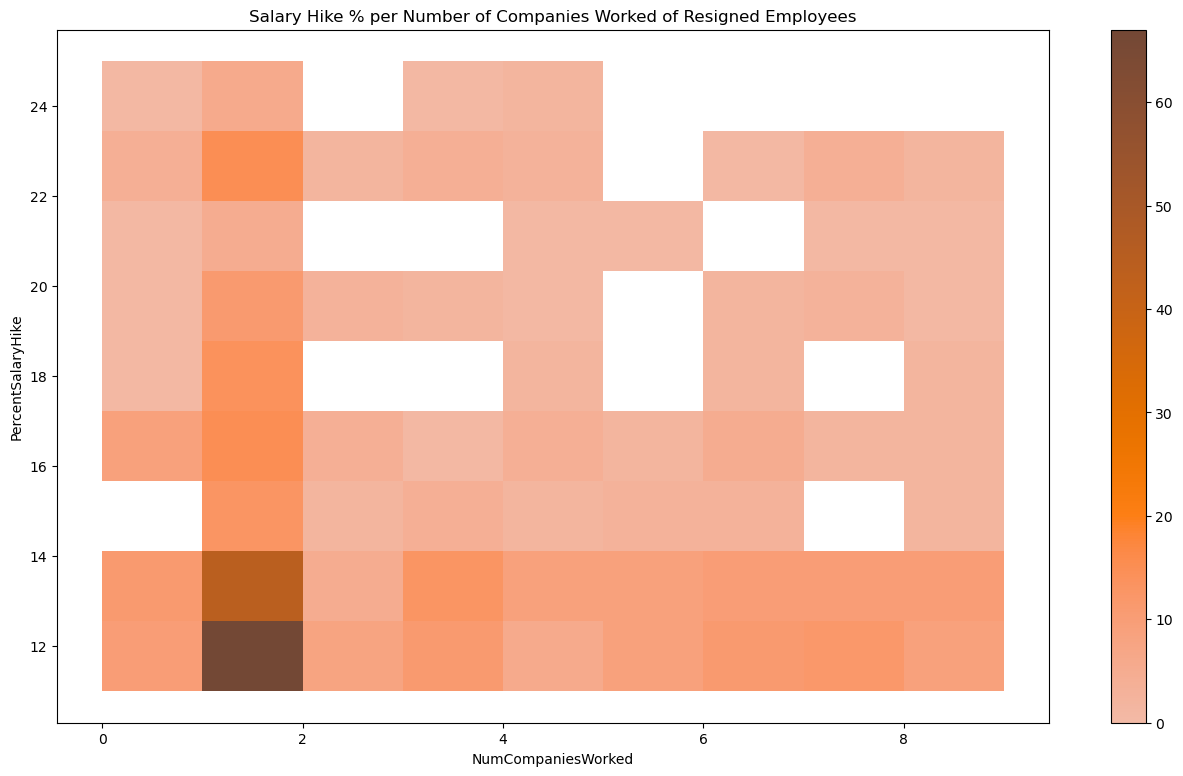

In [483]:
plt.figure(figsize=(16,9))
sns.histplot(df_train_ext[df_train_ext['Attrition'] == 1], x='NumCompaniesWorked', y='PercentSalaryHike', 
             color='tab:orange', cbar=True, bins=9)
plt.title('Salary Hike % per Number of Companies Worked of Resigned Employees')
plt.show()

Attrition has high concentration on employees who have worked for 1-2 companies during their career and have a salary hike of below 18%.

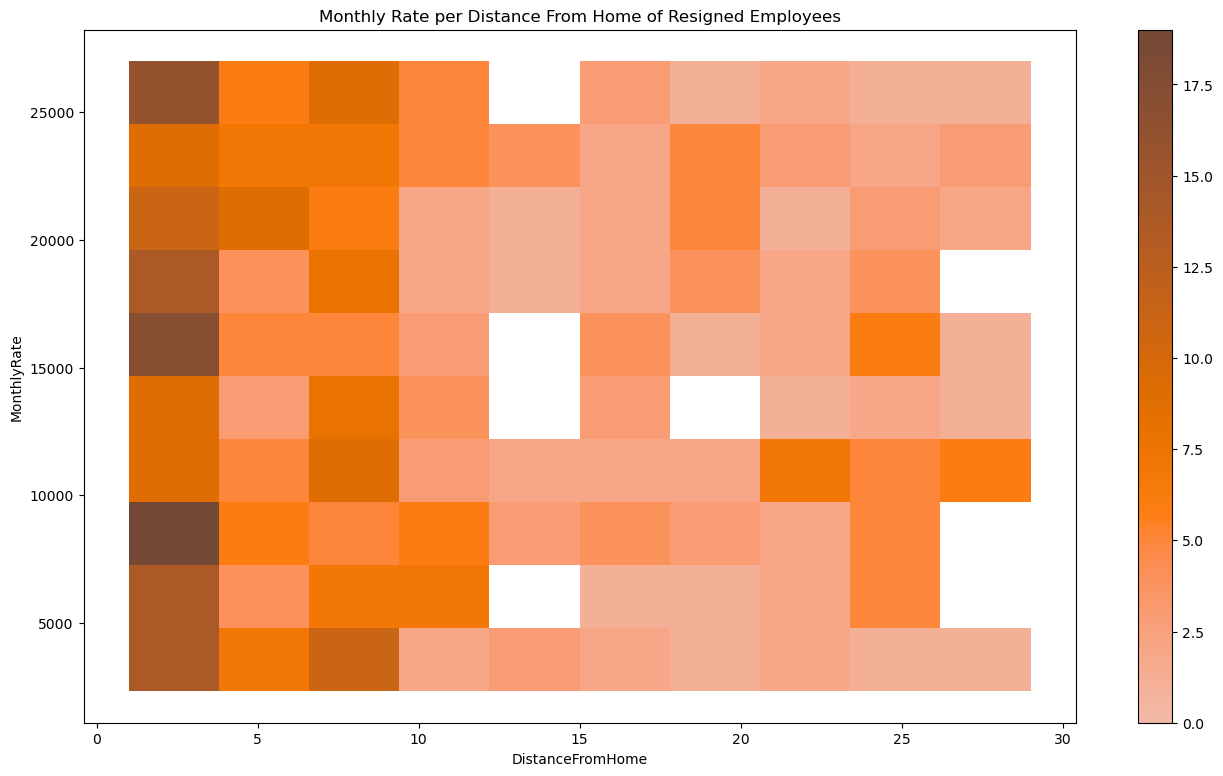

In [557]:
plt.figure(figsize=(16,9))
sns.histplot(df_train_ext[df_train_ext['Attrition'] == 1], x='DistanceFromHome', y='MonthlyRate', color='tab:orange', 
             cbar=True)
plt.title('Monthly Rate per Distance From Home of Resigned Employees')
plt.show()

## A3. Encoding Categorical Variables

In [529]:
# Display categorical variables
cat_var = df_train_ext.select_dtypes(include=['object']).columns.to_list()
cat_var

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [641]:
# Display unique values in categorical columns in the train dataset
for i in cat_var:
    print(i, sorted(df_train_ext[i].unique()))
    print('-'*50)


BusinessTravel ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
--------------------------------------------------
Department ['Human Resources', 'Research & Development', 'Sales']
--------------------------------------------------
EducationField ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
--------------------------------------------------
Gender ['Female', 'Male']
--------------------------------------------------
JobRole ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
--------------------------------------------------
MaritalStatus ['Divorced', 'Married', 'Single']
--------------------------------------------------
Over18 ['Y']
--------------------------------------------------
OverTime ['No', 'Yes']
--------------------------------------------------


In [531]:
# Label Encode the categorical variables in the extended train dataset
df_train_final = df_train_ext.copy()
for variable in cat_var:
    df_train_final[variable] = df_train_final[variable].astype('category').cat.codes
df_train_final

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,1,599,1,24,3,3,1,4,1,42,3,1,2,4,1,2596,5099,1,0,1,13,3,2,80,1,10,2,3,10,0,7,8,0
1,35,2,921,2,8,3,4,1,1,1,46,3,1,8,1,1,2899,10778,1,0,0,17,3,4,80,1,4,3,3,4,2,0,3,0
2,32,2,718,2,26,3,2,1,3,1,80,3,2,7,4,0,4627,16495,0,0,0,17,3,4,80,2,4,3,3,3,2,1,2,0
3,38,2,1488,1,2,3,3,1,3,0,40,3,2,0,1,1,5347,13384,3,0,0,14,3,3,80,0,15,1,1,6,0,0,2,0
4,50,2,1017,1,5,4,3,1,2,0,37,3,5,3,1,2,19033,19805,1,0,1,13,3,3,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,3,1,41,4,2,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3,0
1466,39,2,613,1,6,1,3,1,4,1,42,2,3,0,1,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7,0
1467,27,2,155,1,4,3,1,1,2,1,87,4,2,4,2,1,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3,0
1468,49,1,1023,2,2,3,3,1,4,1,63,2,2,7,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8,0


In [532]:
# Label Encode the categorical variables in the test dataset
for variable in cat_var:
    df_test[variable] = df_test[variable].astype('category').cat.codes
df_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,0,992,1,1,1,3,1,4,1,43,3,1,2,3,2,2318,17778,1,0,0,12,3,4,80,0,1,2,2,1,0,0,0
1,45,2,1136,2,4,4,2,1,3,1,67,3,2,7,1,0,5486,12421,6,0,1,12,3,3,80,1,7,3,3,2,2,2,2
2,37,2,155,1,13,3,1,1,4,1,41,3,1,6,4,0,2741,23577,4,0,1,13,3,2,80,2,13,2,2,7,7,1,7
3,32,2,688,1,1,4,1,1,3,1,89,2,2,0,3,2,5228,20364,1,0,0,13,3,3,80,0,14,2,2,14,10,11,8
4,29,1,464,1,9,1,1,1,3,1,79,3,1,2,4,2,1223,15178,1,0,0,14,3,1,80,0,1,5,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,31,2,755,2,1,1,1,1,3,1,81,2,1,8,4,0,4678,9150,1,0,0,12,3,3,80,1,1,1,3,1,0,0,0
1115,40,2,654,1,26,5,3,1,3,1,96,2,2,2,4,1,6220,6409,1,0,0,14,3,4,80,1,20,4,3,20,10,1,8
1116,42,1,884,1,1,4,3,1,2,0,65,3,2,0,1,1,5238,6069,3,0,0,17,3,1,80,1,10,2,2,5,3,0,2
1117,25,1,1469,2,1,2,5,1,3,1,68,2,2,7,4,1,4799,17519,0,0,0,11,3,4,80,1,5,2,3,4,2,1,3


## A4. Feature Engineering

In [540]:
# Create a new feature called 'monthly_income_rate' by dividing the MonthlyIncome to the MonthyRate
df_train_final['monthly_income_rate'] = df_train_final['MonthlyIncome'] / df_train_final['MonthlyRate']
df_train_final.insert(df_train_final.columns.get_loc('MonthlyRate')+1, 'monhtly_income_rate', df_train_final.pop('monthly_income_rate'))
df_train_final

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,monhtly_income_rate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,1,599,1,24,3,3,1,4,1,42,3,1,2,4,1,2596,5099,0.509119,1,0,1,13,3,2,80,1,10,2,3,10,0,7,8,0
1,35,2,921,2,8,3,4,1,1,1,46,3,1,8,1,1,2899,10778,0.268974,1,0,0,17,3,4,80,1,4,3,3,4,2,0,3,0
2,32,2,718,2,26,3,2,1,3,1,80,3,2,7,4,0,4627,16495,0.280509,0,0,0,17,3,4,80,2,4,3,3,3,2,1,2,0
3,38,2,1488,1,2,3,3,1,3,0,40,3,2,0,1,1,5347,13384,0.399507,3,0,0,14,3,3,80,0,15,1,1,6,0,0,2,0
4,50,2,1017,1,5,4,3,1,2,0,37,3,5,3,1,2,19033,19805,0.961020,1,0,1,13,3,3,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,3,1,41,4,2,2,4,1,2571,12290,0.209194,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3,0
1466,39,2,613,1,6,1,3,1,4,1,42,2,3,0,1,1,9991,21457,0.465629,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7,0
1467,27,2,155,1,4,3,1,1,2,1,87,4,2,4,2,1,6142,5174,1.187089,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3,0
1468,49,1,1023,2,2,3,3,1,4,1,63,2,2,7,2,1,5390,13243,0.407007,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8,0


In [541]:
# Create a new feature in the test dataset called 'monthly_income_rate' by dividing the MonthlyIncome to the MonthyRate
df_test['monthly_income_rate'] = df_test['MonthlyIncome'] / df_test['MonthlyRate']
df_test.insert(df_test.columns.get_loc('MonthlyRate')+1, 'monhtly_income_rate', df_test.pop('monthly_income_rate'))
df_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,monhtly_income_rate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,0,992,1,1,1,3,1,4,1,43,3,1,2,3,2,2318,17778,0.130386,1,0,0,12,3,4,80,0,1,2,2,1,0,0,0
1,45,2,1136,2,4,4,2,1,3,1,67,3,2,7,1,0,5486,12421,0.441671,6,0,1,12,3,3,80,1,7,3,3,2,2,2,2
2,37,2,155,1,13,3,1,1,4,1,41,3,1,6,4,0,2741,23577,0.116257,4,0,1,13,3,2,80,2,13,2,2,7,7,1,7
3,32,2,688,1,1,4,1,1,3,1,89,2,2,0,3,2,5228,20364,0.256728,1,0,0,13,3,3,80,0,14,2,2,14,10,11,8
4,29,1,464,1,9,1,1,1,3,1,79,3,1,2,4,2,1223,15178,0.080577,1,0,0,14,3,1,80,0,1,5,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,31,2,755,2,1,1,1,1,3,1,81,2,1,8,4,0,4678,9150,0.511257,1,0,0,12,3,3,80,1,1,1,3,1,0,0,0
1115,40,2,654,1,26,5,3,1,3,1,96,2,2,2,4,1,6220,6409,0.970510,1,0,0,14,3,4,80,1,20,4,3,20,10,1,8
1116,42,1,884,1,1,4,3,1,2,0,65,3,2,0,1,1,5238,6069,0.863075,3,0,0,17,3,1,80,1,10,2,2,5,3,0,2
1117,25,1,1469,2,1,2,5,1,3,1,68,2,2,7,4,1,4799,17519,0.273931,0,0,0,11,3,4,80,1,5,2,3,4,2,1,3


In [549]:
# Create a new feature in the train dataset called 'salary_hike_per_hop' by diving the PercentSalaryHike to the NumCompaniesWorked
df_train_final['salary_hike_per_hop'] = round(df_train_final['PercentSalaryHike'] / df_train_final['NumCompaniesWorked'], 2)    
df_train_final.insert(df_train_final.columns.get_loc('PercentSalaryHike')+1, 'salary_hike_per_hop', df_train_final.pop('salary_hike_per_hop'))
df_train_final.loc[df_train_final['salary_hike_per_hop'] == np.inf, 'salary_hike_per_hop'] = 0
df_train_final

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,monhtly_income_rate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,salary_hike_per_hop,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,1,599,1,24,3,3,1,4,1,42,3,1,2,4,1,2596,5099,0.509119,1,0,1,13,13.00,3,2,80,1,10,2,3,10,0,7,8,0
1,35,2,921,2,8,3,4,1,1,1,46,3,1,8,1,1,2899,10778,0.268974,1,0,0,17,17.00,3,4,80,1,4,3,3,4,2,0,3,0
2,32,2,718,2,26,3,2,1,3,1,80,3,2,7,4,0,4627,16495,0.280509,0,0,0,17,0.00,3,4,80,2,4,3,3,3,2,1,2,0
3,38,2,1488,1,2,3,3,1,3,0,40,3,2,0,1,1,5347,13384,0.399507,3,0,0,14,4.67,3,3,80,0,15,1,1,6,0,0,2,0
4,50,2,1017,1,5,4,3,1,2,0,37,3,5,3,1,2,19033,19805,0.961020,1,0,1,13,13.00,3,3,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,3,1,41,4,2,2,4,1,2571,12290,0.209194,4,0,0,17,4.25,3,3,80,1,17,3,3,5,2,0,3,0
1466,39,2,613,1,6,1,3,1,4,1,42,2,3,0,1,1,9991,21457,0.465629,4,0,0,15,3.75,3,1,80,1,9,5,3,7,7,1,7,0
1467,27,2,155,1,4,3,1,1,2,1,87,4,2,4,2,1,6142,5174,1.187089,1,0,1,20,20.00,4,2,80,1,6,0,3,6,2,0,3,0
1468,49,1,1023,2,2,3,3,1,4,1,63,2,2,7,2,1,5390,13243,0.407007,2,0,0,14,7.00,3,4,80,0,17,3,2,9,6,0,8,0


In [551]:
# Create a new feature in the test dataset called 'salary_hike_per_hop' by diving the PercentSalaryHike to the NumCompaniesWorked
df_test['salary_hike_per_hop'] = round(df_test['PercentSalaryHike'] / df_test['NumCompaniesWorked'],2)
df_test.insert(df_test.columns.get_loc('PercentSalaryHike')+1, 'salary_hike_per_hop', df_test.pop('salary_hike_per_hop'))
df_test.loc[df_test['salary_hike_per_hop'] == np.inf, 'salary_hike_per_hop'] = 0
df_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,monhtly_income_rate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,salary_hike_per_hop,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,0,992,1,1,1,3,1,4,1,43,3,1,2,3,2,2318,17778,0.130386,1,0,0,12,12.00,3,4,80,0,1,2,2,1,0,0,0
1,45,2,1136,2,4,4,2,1,3,1,67,3,2,7,1,0,5486,12421,0.441671,6,0,1,12,2.00,3,3,80,1,7,3,3,2,2,2,2
2,37,2,155,1,13,3,1,1,4,1,41,3,1,6,4,0,2741,23577,0.116257,4,0,1,13,3.25,3,2,80,2,13,2,2,7,7,1,7
3,32,2,688,1,1,4,1,1,3,1,89,2,2,0,3,2,5228,20364,0.256728,1,0,0,13,13.00,3,3,80,0,14,2,2,14,10,11,8
4,29,1,464,1,9,1,1,1,3,1,79,3,1,2,4,2,1223,15178,0.080577,1,0,0,14,14.00,3,1,80,0,1,5,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,31,2,755,2,1,1,1,1,3,1,81,2,1,8,4,0,4678,9150,0.511257,1,0,0,12,12.00,3,3,80,1,1,1,3,1,0,0,0
1115,40,2,654,1,26,5,3,1,3,1,96,2,2,2,4,1,6220,6409,0.970510,1,0,0,14,14.00,3,4,80,1,20,4,3,20,10,1,8
1116,42,1,884,1,1,4,3,1,2,0,65,3,2,0,1,1,5238,6069,0.863075,3,0,0,17,5.67,3,1,80,1,10,2,2,5,3,0,2
1117,25,1,1469,2,1,2,5,1,3,1,68,2,2,7,4,1,4799,17519,0.273931,0,0,0,11,0.00,3,4,80,1,5,2,3,4,2,1,3


## A4.1 Feature Selection

In [559]:
# Identify the predictor variables
X_train = df_train_final.drop(columns=['Attrition', 'EmployeeCount', 'Over18', 'StandardHours'])
y_train = df_train_final['Attrition']

X_test = df_test.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])
# Test the dataset into training, testing, and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [560]:
# Check the shape of the train, test, and validation sets
print(X_train.shape)
print(y_train.shape)
print(X_tr.shape)
print(y_tr.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)

(3147, 32)
(3147,)
(2360, 32)
(2360,)
(787, 32)
(787,)
(1119, 32)


# B. MODELING

## B1. Naive Bayes Model

In [561]:
# Instantiate the model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_tr, y_tr)

# Predict on test dataset
gnb_preds = gnb.predict(X_test)

## B1.1 Model Evaluation

In [562]:
# Create a function to tabulate the cross validation metrics

def cv_results(model_name, model_object, metric, summary):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit machine learning model object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'accuracy': 'mean_test_accuracy',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'auc': 'mean_test_roc_auc'}
    
    # Get all the results from the CV and put them in a df
    cv_results_df = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results_df.iloc[cv_results_df[metric_dict[metric]].idxmax(), :]
    
    # Extract Accuracy, precision, recall, and f1 score from that row
    accuracy = (best_estimator_results.mean_test_accuracy*100).round(2).astype(str)
    precision = (best_estimator_results.mean_test_precision*100).round(2).astype(str)
    recall = (best_estimator_results.mean_test_recall*100).round(2).astype(str)
    f1 = (best_estimator_results.mean_test_f1*100).round(2).astype(str)
    auc = best_estimator_results.mean_test_roc_auc.round(2).astype(str)
    
    # Create table of results
    model_score = pd.DataFrame([[model_name, '{0}%'.format(accuracy), '{0}%'.format(precision), '{0}%'.format(recall), '{0}%'.format(f1), auc]], columns=['model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'])
    summary = pd.concat([summary, model_score], ignore_index=True)

    return summary


# Create a function to tabulate the prediction metrics

def test_result(model_name, preds, y_test_data, summary):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    # Extract Accuracy, precision, recall, and f1 score of the prediction
    accuracy = (accuracy_score(y_test_data, preds)*100).round(2).astype(str)
    precision = (precision_score(y_test_data, preds)*100).round(2).astype(str)
    recall = (recall_score(y_test_data, preds)*100).round(2).astype(str)
    f1 = (f1_score(y_test_data, preds)*100).round(2).astype(str)
    auc = roc_auc_score(y_test_data, preds).round(2).astype(str)
    
    # Create table of results
    model_score = pd.DataFrame([[model_name, '{0}%'.format(accuracy), '{0}%'.format(precision), '{0}%'.format(recall), '{0}%'.format(f1), auc]], columns=['model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'])
    summary = pd.concat([summary, model_score], ignore_index=True)

    return summary

In [563]:
# Create a blank dataframe for the summary of the metrics
sum_results = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'])

In [564]:
# Make predictions on the validation set based on the best parameters
gnb_val_preds = gnb.predict(X_val)

In [565]:
# Display the prediction metrics
sum_results = test_result('Naive Bayes (Validation Set Prediction)', gnb_val_preds, y_val, sum_results)
sum_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Naive Bayes (Validation Set Prediction),81.07%,37.8%,56.88%,45.42%,0.71


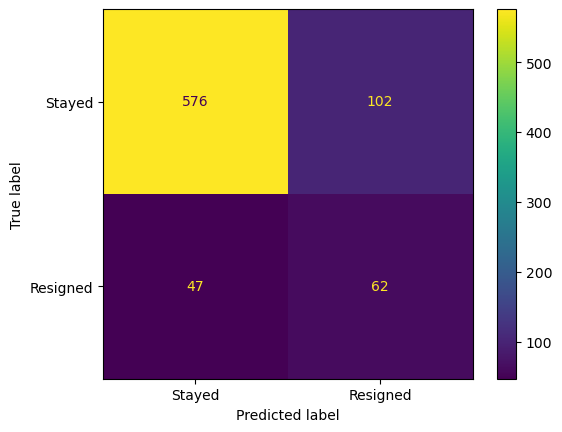

In [566]:
# Display the results in a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, gnb_val_preds)
plt.xticks(ticks=gnb.classes_, labels=['Stayed', 'Resigned'])
plt.yticks(ticks=gnb.classes_, labels=['Stayed', 'Resigned'])
plt.show()

## B2. Decision Tree

In [567]:
%%time
# Instantiate the model
dt = DecisionTreeClassifier(random_state=0)

# Fit the model
dt.fit(X_tr, y_tr)

# Predict on test dataset
dt_preds = dt.predict(X_test)

CPU times: total: 46.9 ms
Wall time: 78.1 ms


## B2.1 Model Evaluation

In [568]:
# Make predictions on the validation set
dt_val_preds = dt.predict(X_val)

In [569]:
# Display the prediction metrics
sum_results = test_result('Decision Tree - Base Model (Validation Set Prediction)', dt_val_preds, y_val, sum_results)
sum_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Naive Bayes (Validation Set Prediction),81.07%,37.8%,56.88%,45.42%,0.71
1,Decision Tree - Base Model (Validation Set Pre...,79.54%,30.0%,35.78%,32.64%,0.61


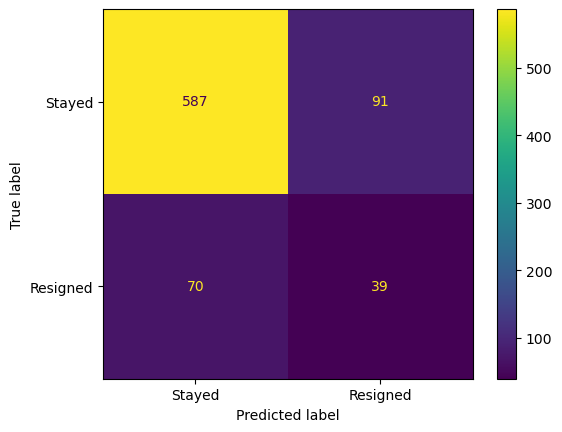

In [570]:
# Display the results in a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, dt_val_preds, values_format='d')
plt.xticks(ticks=dt.classes_, labels=['Stayed', 'Resigned'])
plt.yticks(ticks=dt.classes_, labels=['Stayed', 'Resigned'])
plt.show()

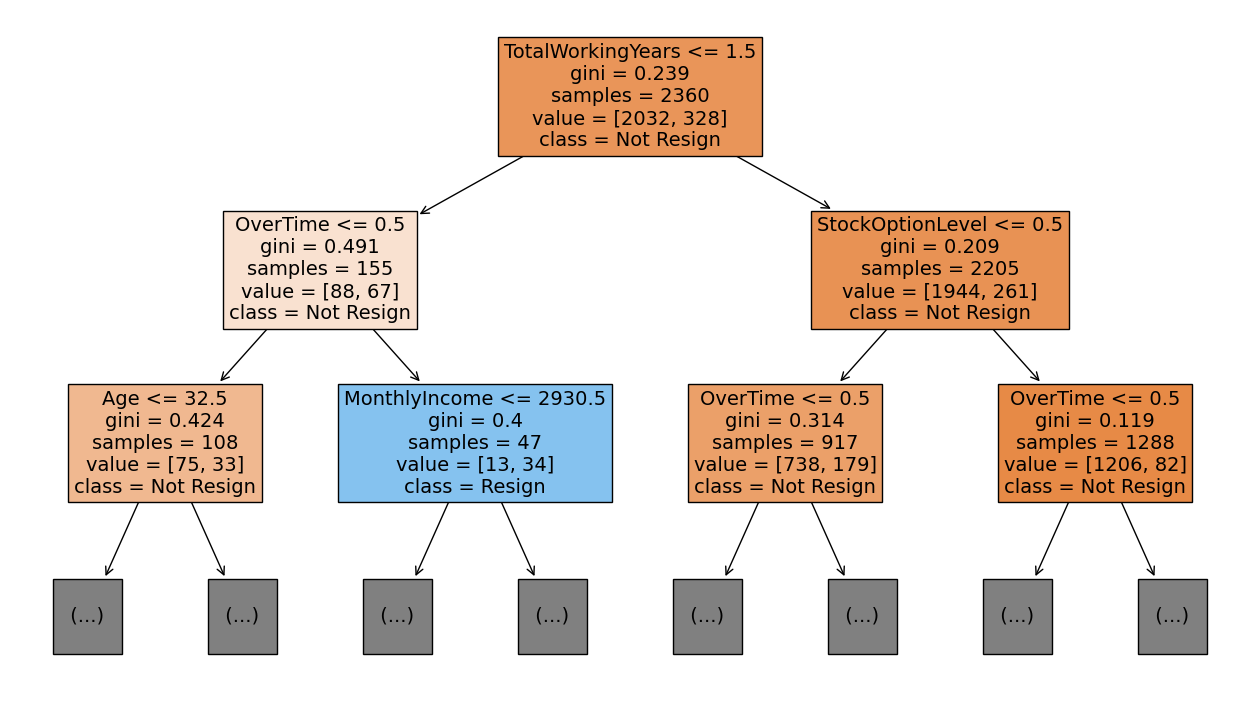

In [571]:
# Plot the tree
plt.figure(figsize=(16,9))
plot_tree(dt, max_depth=2, fontsize=14, feature_names=X_train.columns, 
          class_names={0:'Not Resign', 1:'Resign'}, filled=True);
plt.show()

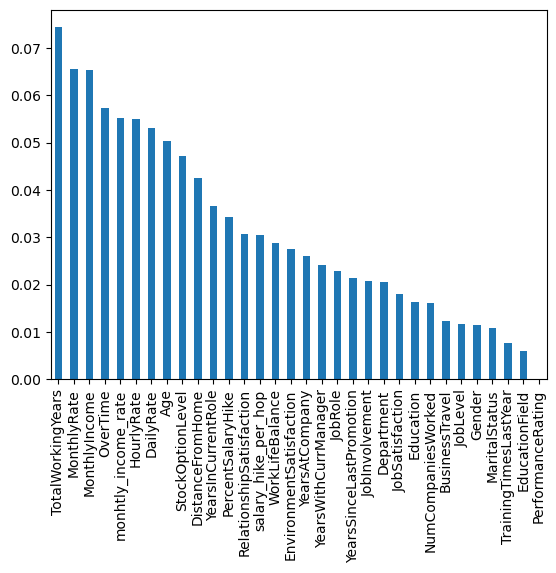

In [572]:
# Display feature importance
importances = dt.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.show()

The decision tree gives greater importance to the variable MonthlyIncome, MonthlyRate, and TotalWorkingYears in making the predictions.

## B2.2 Hyperparameter Tuning

In [596]:
%%time
#Create a dictionary for the max_depth and min_samples_leaf hyperparameter
hyperpara = {'max_depth':[4,5,6,7,8, None],
             'min_samples_leaf': [5, 8, 10, 20, 30, 50]}

# Create a dictionary of scoring metrics to capture
#auc = make_scorer(roc_auc_score)
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#Instantiate the decision tree classifier
dt_tuned = DecisionTreeClassifier(random_state = 0)

# Create a custom validation set with replacement
split_indices = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_indices)

# Instantiate the GridSearch
dt_gscv = GridSearchCV(dt_tuned, 
                   hyperpara, 
                   scoring = scoring, 
                   cv=custom_split, 
                   refit="recall")

# Fit the model
dt_gscv.fit(X_train, y_train)

CPU times: total: 1.16 s
Wall time: 2.05 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, None],
                         'min_samples_leaf': [5, 8, 10, 20, 30, 50]},
             refit='recall',
             scoring={'precision', 'accuracy', 'f1', 'recall', 'roc_auc'})

# Pickle the model
path = r'C:\Users\MIllenium\Desktop\Personal\ML Projects\Australia Rain Prediction\\'
with open(path+'dt_cv_model_rain_prediction.pickle', 'wb') as to_write:
    pickle.dump(dt_gscv, to_write)

Don't forget to comment out this block of code and the code fitting the model.

# Open pickled model
with open(path+'dt_cv_model_rain_prediction.pickle', 'rb') as to_read:
    dt_gscv = pickle.load(to_read)

## B2.2a Model Evaluation

In [597]:
# Examine the best model from GridSearch
dt_gscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=0)

In [598]:
# Displya the best validation score for the selected metric
print("Best Avg. Validation Score: ", "%.4f" % dt_gscv.best_score_)

Best Avg. Validation Score:  0.3520


In [599]:
# Make predictions on test dataset
dt_tuned_preds = dt_gscv.best_estimator_.predict(X_test)

In [602]:
# Display the cross validation metrics
sum_results = cv_results('Decision Tree - Tuned (Cross-Validation)', dt_gscv, 'recall', sum_results)
sum_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Naive Bayes (Validation Set Prediction),81.07%,37.8%,56.88%,45.42%,0.71
1,Decision Tree - Base Model (Validation Set Pre...,79.54%,30.0%,35.78%,32.64%,0.61
2,Decision Tree - Tuned (Cross-Validation),85.78%,45.99%,35.2%,39.87%,0.7


In [603]:
# Make predictions on the validation set
dt_tuned_val_preds = dt_gscv.best_estimator_.predict(X_val)

In [604]:
# Display the prediction metrics
sum_results = test_result('Decision Tree - Tuned (Validation Set Prediction)', dt_tuned_val_preds, y_val, sum_results)
sum_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Naive Bayes (Validation Set Prediction),81.07%,37.8%,56.88%,45.42%,0.71
1,Decision Tree - Base Model (Validation Set Pre...,79.54%,30.0%,35.78%,32.64%,0.61
2,Decision Tree - Tuned (Cross-Validation),85.78%,45.99%,35.2%,39.87%,0.7
3,Decision Tree - Tuned (Validation Set Prediction),90.47%,85.42%,37.61%,52.23%,0.68


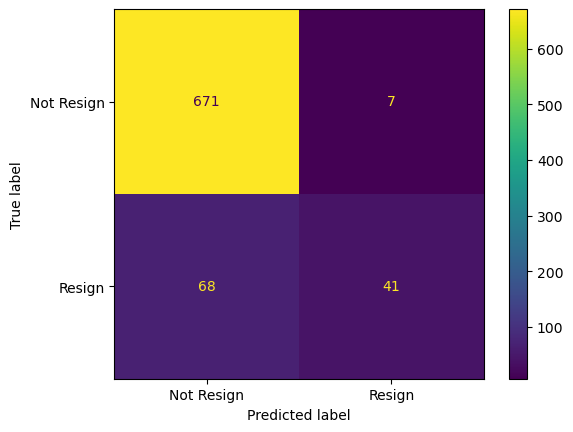

In [605]:
# Display the results in a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, dt_tuned_val_preds, values_format='d')
plt.xticks(ticks=dt_gscv.classes_, labels=['Not Resign', 'Resign'])
plt.yticks(ticks=dt_gscv.classes_, labels=['Not Resign', 'Resign'])
plt.show()

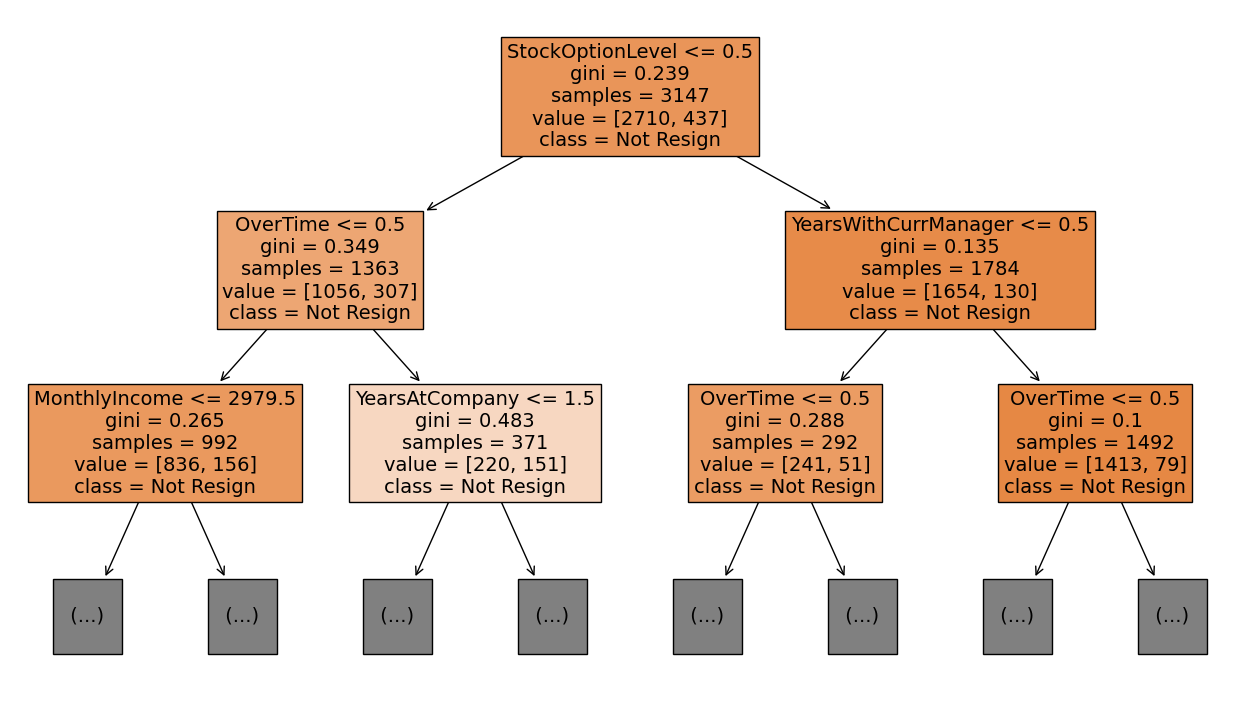

In [606]:
# Plot the tree
plt.figure(figsize=(16,9))
plot_tree(dt_gscv.best_estimator_, max_depth=2, fontsize=14, feature_names=X_train.columns, 
          class_names={0:'Not Resign', 1:'Resign'}, filled=True);
plt.show()

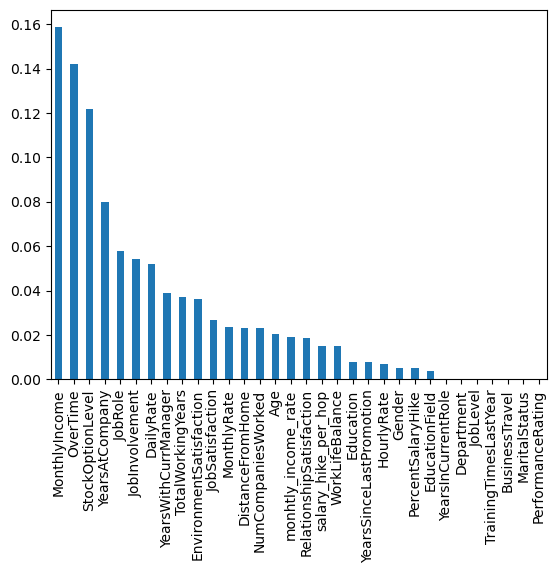

In [607]:
# Display feature importance
importances = dt_gscv.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.show()

## B3. Random Forest

In [614]:
%%time
# Instantiate the model
rf = RandomForestClassifier(random_state=0)

# Create a disctionary of parameters
hyperpara = {'max_depth': [8, 10],
             'min_samples_leaf': [3,2,1],
             'min_samples_split': [10, 5],
             'max_features': [5, 6, 7, 8, 16],
             'n_estimators': [50, 100]}

# Create a dictionary of scoring metrics to capture
#scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Create a custom validation set with replacement
split_indices = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_indices)

# Use GridSearchCV to find the best parameters
rf_gscv = GridSearchCV(rf, hyperpara, scoring=scoring, refit = 'recall', cv = custom_split, n_jobs=-1)

# Fit the model
rf_gscv.fit(X_train, y_train)

CPU times: total: 1.47 s
Wall time: 54 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [5, 6, 7, 8, 16],
                         'min_samples_leaf': [3, 2, 1],
                         'min_samples_split': [10, 5],
                         'n_estimators': [50, 100]},
             refit='recall',
             scoring={'precision', 'accuracy', 'f1', 'recall', 'roc_auc'})

# Pickle the model
path = r'C:\Users\MIllenium\Desktop\Personal\ML Projects\Australia Rain Prediction\\'
with open(path+'rf_cv_model_rain_prediction.pickle', 'wb') as to_write:
    pickle.dump(rf_gscv, to_write)

Don't forget to comment out this block of code and the code fitting the model.

# Open pickled model
with open(path+'rf_cv_model_rain_prediction.pickle', 'rb') as to_read:
    rf_gscv = pickle.load(to_read)

## B3.1 Model Evaluation

In [615]:
# Examine the best model from GridSearch
rf_gscv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=16, min_samples_split=10,
                       n_estimators=50, random_state=0)

In [616]:
# Display the parameters of the best estimator
rf_gscv.best_params_

{'max_depth': 10,
 'max_features': 16,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [619]:
# Display the cross validation metrics
sum_results = cv_results('Random Forest (Cross-Validation)', rf_gscv, 'recall', sum_results)
sum_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Naive Bayes (Validation Set Prediction),81.07%,37.8%,56.88%,45.42%,0.71
1,Decision Tree - Base Model (Validation Set Pre...,79.54%,30.0%,35.78%,32.64%,0.61
2,Decision Tree - Tuned (Cross-Validation),85.78%,45.99%,35.2%,39.87%,0.7
3,Decision Tree - Tuned (Validation Set Prediction),90.47%,85.42%,37.61%,52.23%,0.68
4,Random Forest (Cross-Validation),87.35%,57.14%,22.35%,32.13%,0.81


In [620]:
# Make predictions on the validation set based on the best parameters
rf_val_preds = rf_gscv.best_estimator_.predict(X_val)

In [621]:
# Display the prediction metrics on the validation set
sum_results = test_result('Random Forest (Validation Set Prediction)', rf_val_preds, y_val, sum_results)
sum_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Naive Bayes (Validation Set Prediction),81.07%,37.8%,56.88%,45.42%,0.71
1,Decision Tree - Base Model (Validation Set Pre...,79.54%,30.0%,35.78%,32.64%,0.61
2,Decision Tree - Tuned (Cross-Validation),85.78%,45.99%,35.2%,39.87%,0.7
3,Decision Tree - Tuned (Validation Set Prediction),90.47%,85.42%,37.61%,52.23%,0.68
4,Random Forest (Cross-Validation),87.35%,57.14%,22.35%,32.13%,0.81
5,Random Forest (Validation Set Prediction),94.79%,100.0%,62.39%,76.84%,0.81


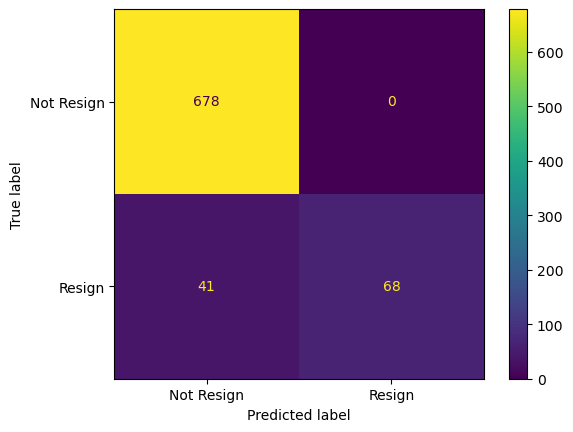

In [622]:
# Display the results in a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, rf_val_preds, values_format='d')
plt.xticks(ticks=rf_gscv.classes_, labels=['Not Resign', 'Resign'])
plt.yticks(ticks=rf_gscv.classes_, labels=['Not Resign', 'Resign'])
plt.show()

In [623]:
# Make predictions on the testing set based on the best parameters
rf_preds = rf_gscv.best_estimator_.predict(X_test)

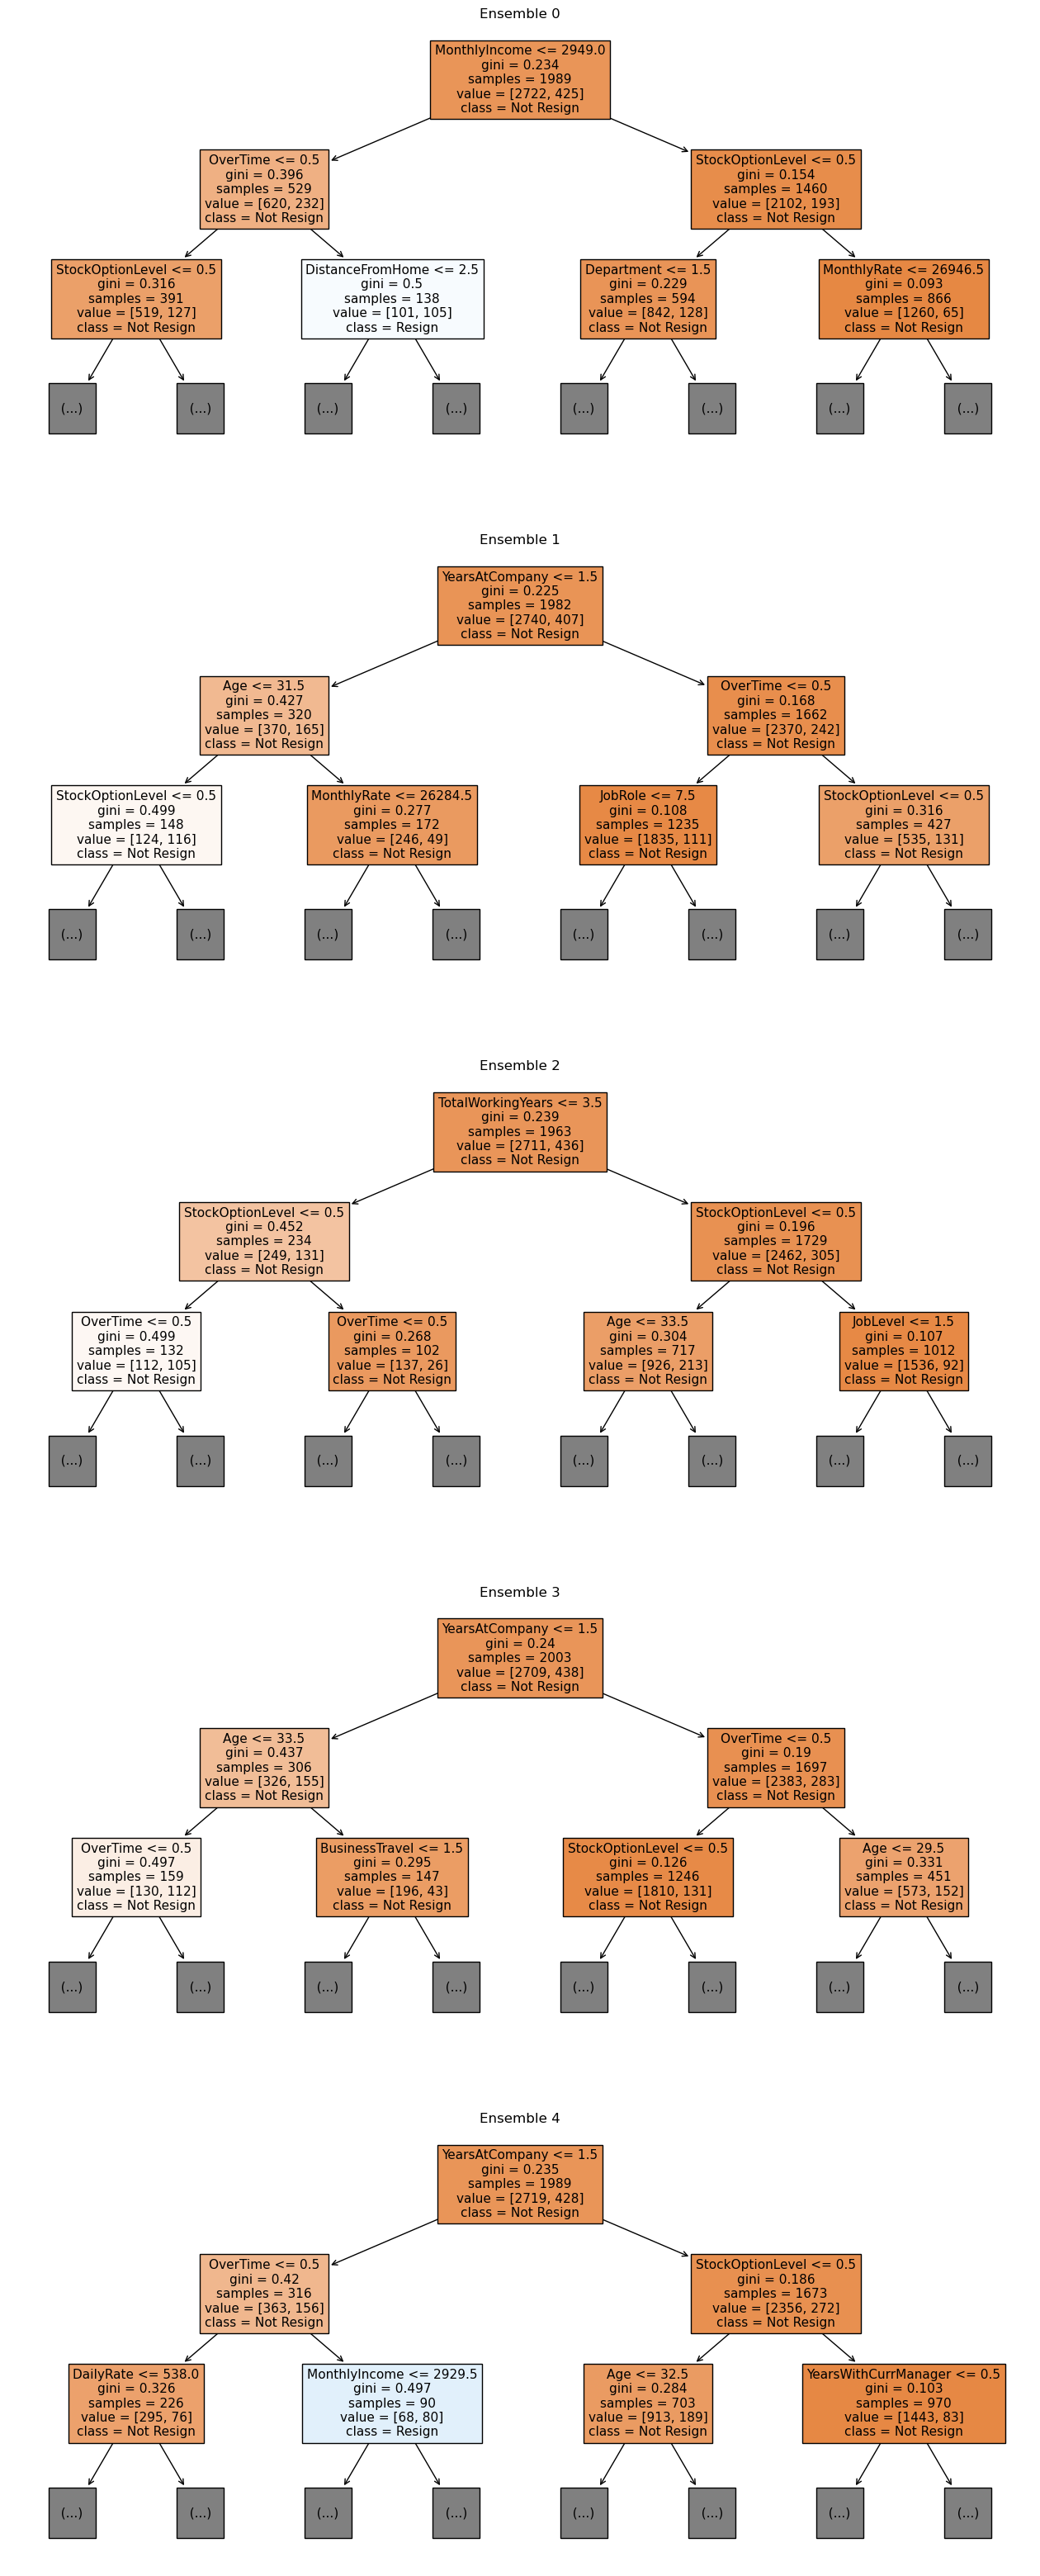

In [624]:
# Plot the tree
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16, 40))

for i in range(5):
    plot_tree(rf_gscv.best_estimator_.estimators_[i], max_depth=2, fontsize=11, feature_names=X_train.columns, 
              class_names={0:'Not Resign', 1:'Resign'}, filled=True, ax=ax[i])
    ax[i].set_title('Ensemble {}'.format(i))
plt.show()

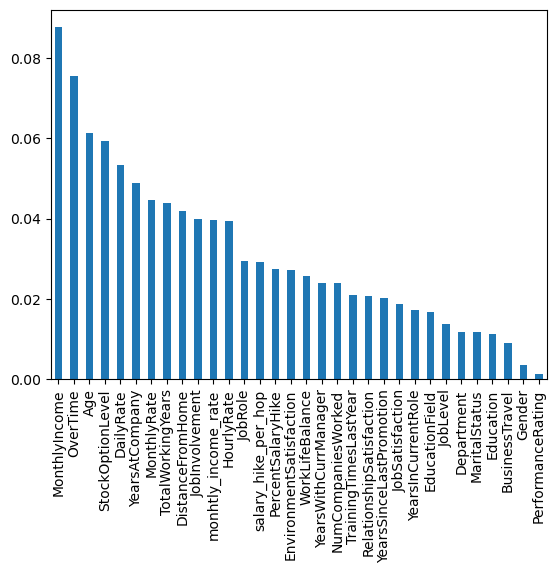

In [627]:
# Display feature importance
importances = rf_gscv.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.show()

## B4. XGBoost

In [628]:
%%time
# Instantiate the model
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a disctionary of parameters
hyperpara = {'max_depth': [4, 6, 8, 10, 20],
             'min_child_weight': [3, 5],
             'learning_rate': [.1, .2, .3],
             'n_estimators': [15, 20, 30, 50, 100],
             'subsample': [.7],
             'colsample_bytree': [.7]}

# Create a dictionary of scoring metrics to capture
#scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Create a custom validation set with replacement
split_indices = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_indices)

# Use GridSearchCV to find the best parameters
xgb_gscv = GridSearchCV(xgb, hyperpara, scoring=scoring, refit = 'recall', cv = custom_split, n_jobs=-1, verbose=1)

# Fit the model
xgb_gscv.fit(X_train, y_train)

Fitting 1 folds for each of 150 candidates, totalling 150 fits
CPU times: total: 3.7 s
Wall time: 31.7 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_child_weight': [3, 5],
                         'n_estimators': [15, 20, 30, 50, 100],
                         'subsample': [0.7]},
             refit='recall',
             scoring={'precision', 'accuracy', 'f1', 'recall', 'roc_auc'},
             verbose=1)

# Pickle the model
path = r'C:\Users\MIllenium\Desktop\Personal\ML Projects\Australia Rain Prediction\\'
with open(path+'xgb_cv_model_rain_prediction.pickle', 'wb') as to_write:
    pickle.dump(xgb_gscv, to_write)

Don't forget to comment out this block of code and the code fitting the model.

# Open pickled model
with open(path+'xgb_cv_model_rain_prediction.pickle', 'rb') as to_read:
    xgb_gscv = pickle.load(to_read)

## B4.1 Model Evaluation

In [629]:
# Examine the best model from GridSearch
xgb_gscv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [630]:
# Display the cross validation metrics
sum_results = cv_results('XGBoost (Cross-Validation)', xgb_gscv, 'recall', sum_results)
sum_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Naive Bayes (Validation Set Prediction),81.07%,37.8%,56.88%,45.42%,0.71
1,Decision Tree - Base Model (Validation Set Pre...,79.54%,30.0%,35.78%,32.64%,0.61
2,Decision Tree - Tuned (Cross-Validation),85.78%,45.99%,35.2%,39.87%,0.7
3,Decision Tree - Tuned (Validation Set Prediction),90.47%,85.42%,37.61%,52.23%,0.68
4,Random Forest (Cross-Validation),87.35%,57.14%,22.35%,32.13%,0.81
5,Random Forest (Validation Set Prediction),94.79%,100.0%,62.39%,76.84%,0.81
6,XGBoost (Cross-Validation),88.17%,59.63%,36.31%,45.14%,0.81


In [631]:
# Make predictions on the testing set based on the best parameters
xgb_preds = xgb_gscv.best_estimator_.predict(X_test)

In [632]:
# Make predictions on the validation set based on the best parameters
xgb_val_preds = xgb_gscv.best_estimator_.predict(X_val)

In [633]:
# Display the prediction metrics on the validation set
sum_results = test_result('XGBoost (Validation Set Prediction)', xgb_val_preds, y_val, sum_results)
sum_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Naive Bayes (Validation Set Prediction),81.07%,37.8%,56.88%,45.42%,0.71
1,Decision Tree - Base Model (Validation Set Pre...,79.54%,30.0%,35.78%,32.64%,0.61
2,Decision Tree - Tuned (Cross-Validation),85.78%,45.99%,35.2%,39.87%,0.7
3,Decision Tree - Tuned (Validation Set Prediction),90.47%,85.42%,37.61%,52.23%,0.68
4,Random Forest (Cross-Validation),87.35%,57.14%,22.35%,32.13%,0.81
5,Random Forest (Validation Set Prediction),94.79%,100.0%,62.39%,76.84%,0.81
6,XGBoost (Cross-Validation),88.17%,59.63%,36.31%,45.14%,0.81
7,XGBoost (Validation Set Prediction),99.75%,100.0%,98.17%,99.07%,0.99


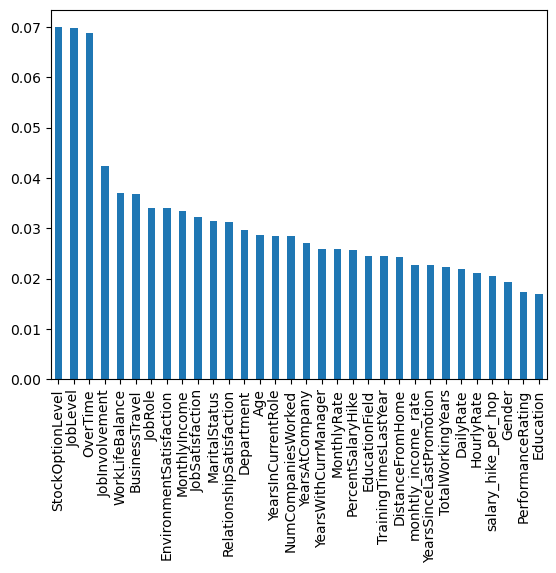

In [634]:
# Display feature importance
importances = xgb_gscv.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
#plt.xticks(rotation=45, ha='right')
plt.show()

## B.5 Model Selection

In [635]:
best_model = sum_results[sum_results['model'].str.contains('(Cross-Validation)', regex=False)]
best_model[best_model['recall'] == best_model['recall'].max()]

,model,accuracy,precision,recall,f1_score,roc_auc_score
6,XGBoost (Cross-Validation),88.17%,59.63%,36.31%,45.14%,0.81


In [637]:
final_preds = xgb_gscv.best_estimator_.predict_proba(X_test)[:,1]
submission = pd.DataFrame({'EmployeeID': test['id'], 'Att': final_preds})

path_win = r'C:\Users\MIllenium\Desktop\Personal\ML Projects\Dataset\playground-series-s3e3\submission.csv'
win = pd.read_csv(path_win)

compare = pd.concat([win, submission['Att']], axis=1)
compare['Variance'] = compare['Attrition'] - compare['Att']
compare
compare.describe()

,id,Attrition,Att,Variance
count,1119.000000,1119.000000,1119.000000,1119.000000
mean,2236.000000,0.140825,0.120558,0.020267
std,323.171781,0.203622,0.240269,0.112478
min,1677.000000,0.001286,0.000016,-0.606430
25%,1956.500000,0.018813,0.003274,0.003893
50%,2236.000000,0.049584,0.014036,0.016538
75%,2515.500000,0.160353,0.084609,0.050726
max,2795.000000,0.992597,0.997464,0.566225


In [638]:
compare[compare['Variance'] <= 0.3]

,id,Attrition,Att,Variance
0,1677,0.109061,0.047570,0.061491
1,1678,0.209445,0.004187,0.205259
2,1679,0.018225,0.014815,0.003410
3,1680,0.048064,0.005383,0.042680
4,1681,0.428596,0.735175,-0.306579
...,...,...,...,...
1114,2791,0.066404,0.045655,0.020749
1115,2792,0.005989,0.001040,0.004949
1116,2793,0.019292,0.010367,0.008925
1117,2794,0.041466,0.004888,0.036579


In [ ]:
pp = xgb_gscv.best_estimator_.predict_proba(X_test)
pp = pd.DataFrame(pp)
pp

In [ ]:
from sklearn.metrics import log_loss
log_loss(win['Attrition'], submission['Att'])